# Imports

In [1]:
import DBOpt 
import numpy as np

### Example data to be clustered

In [2]:
sim_clusters = np.genfromtxt("D:\\DBCV Paper\\Simulated Data\\Circle\\Sim\\C01.csv", delimiter = ',')
X = sim_clusters[:,:2]

# DBOpt with DBSCAN

In [3]:
#Setting hyperparameters for DBOpt
model = DBOpt.DBOpt(algorithm = 'DBSCAN', runs = 200, rand_n = 40, eps = [3,200],  min_samples = [3,200])

In [4]:
#Optimizing the parameter space
model.optimize(X)

|   iter    |  target   |    eps    | min_sa... |
-------------------------------------------------
| 1         | -1.0      | 125.1     | 12.06     |
| 2         | -1.0      | 71.59     | 146.3     |
| 3         | -1.0      | 129.6     | 146.1     |
| 4         | -1.0      | 21.47     | 73.89     |
| 5         | -0.64     | 75.4      | 5.977     |
| 6         | -1.0      | 9.143     | 126.3     |
| 7         | -1.0      | 186.9     | 162.9     |
| 8         | 0.07      | 101.0     | 43.08     |
| 9         | -1.0      | 156.0     | 145.3     |
| 10        | -1.0      | 35.91     | 70.49     |
| 11        | -1.0      | 186.0     | 151.2     |
| 12        | -1.0      | 63.3      | 102.9     |
| 13        | 0.01      | 189.2     | 90.72     |
| 14        | -1.0      | 133.3     | 162.9     |
| 15        | -1.0      | 49.03     | 199.4     |
| 16        | -1.0      | 79.29     | 119.9     |
| 17        | -1.0      | 171.3     | 167.5     |
| 18        | -1.0      | 129.2     | 171.1     |


In [5]:
#Storing the sweep array as parameter_sweep
parameter_sweep = model.parameter_sweep_
chosen_parameters = model.parameters_
print(chosen_parameters)

eps: 54.601382578647275, min_samples: 21


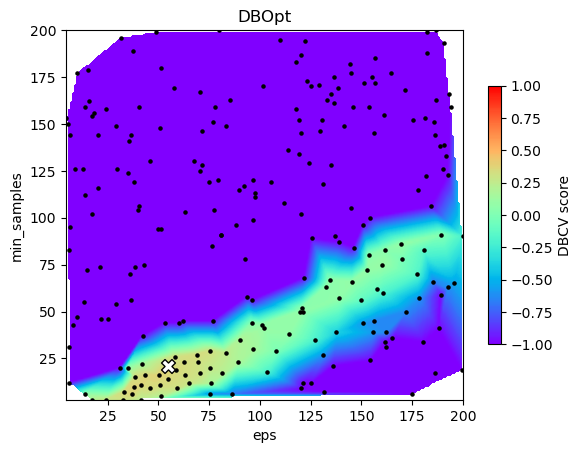

In [6]:
#Plotting the optimization sweep
optimization_plot = model.plot_optimization()

In [7]:
#Clustering the data to the chosen parameters from the optimization
model.fit(X)

In [8]:
#Cluster labels can be stored for later use
labels = model.labels_
#The DBCV score can be checked
print(model.DBCV_score_)

0.36577448568445775


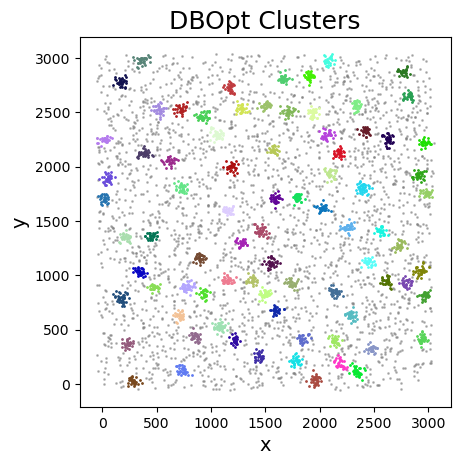

In [9]:
#plotting clusters
cluster_plot = model.plot_clusters()

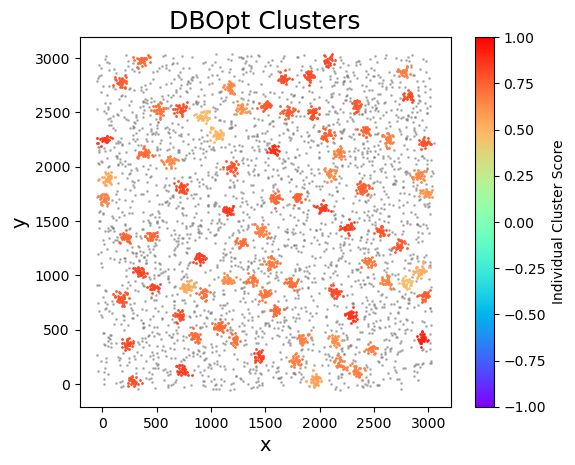

In [10]:
#clusters can be plotted colormapped to individual cluster scores
cluster_plot_ind_scores = model.plot_clusters(ind_cluster_scores = True)

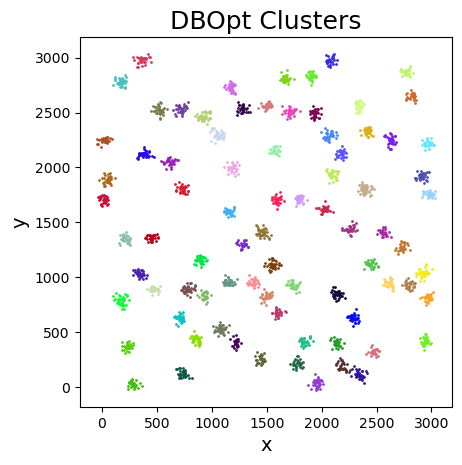

In [11]:
#clusters can be plotted with and without noise
cluster_plot_no_noise = model.plot_clusters(ind_cluster_scores = False, show_noise = False)

## Additional Options

In [ ]:
#the optimize_fit function will perform both the optimizaiton and the fit simultaneously
model.optimize_fit(X)

In [ ]:
# Parameters can be scaled equally to each other by setting scale_params = True. This is helpful when parameter spaces are vastly different
model = DBOpt.DBOpt(algorithm = 'DBSCAN', runs = 200, rand_n = 40, eps = [3,200],  min_samples = [4,15], scale_params = True)
model.optimize_fit(X)

In [35]:
# Parameters can be set to constants when optimizing
model = DBOpt.DBOpt(algorithm = 'DBSCAN', runs = 200, rand_n = 40, eps = [3,200],  min_samples = 6)
model.optimize_fit(X)

# ------------------------------------------------------------------------------------------

# DBOpt with HDBSCAN

### For HDBSCAN, min_cluster_size, min_samples, cluster_selection_method, cluster_selection_epsilon, and alpha can all be optimized. 

### If parameters are not set to a range or a constant, they will follow the default option as defined by the HDBSCAN library (i.e. cluster_selection_epsilon = 0).

In [12]:
#Setting hyperparameters for DBOpt
model = DBOpt.DBOpt(algorithm = 'HDBSCAN', runs = 200, rand_n = 40, min_cluster_size = [3,200],  min_samples = [3,200],
                    cluster_selection_method = ['eom', 'leaf'], cluster_selection_epsilon = [0,50], alpha = [0.5,3], 
                    scale_params = True)

In [13]:
model.optimize_fit(X)

|   iter    |  target   |   alpha   | cluste... | cluste... | min_cl... | min_sa... |
-------------------------------------------------------------------------------------
| 1         | -1.0      | 0.02189   | 0.08676   | 0.8974    | 0.3241    | 0.5739    |
| 2         | 0.18      | 0.3648    | 0.38      | 0.9626    | 0.3253    | 0.1574    |
| 3         | -1.0      | 0.8685    | 0.6051    | 0.6951    | 0.6298    | 0.9236    |
| 4         | -1.0      | 0.1635    | 0.6598    | 0.7616    | 0.05971   | 0.7999    |
| 5         | 0.09      | 0.9284    | 0.3335    | 0.6382    | 0.7467    | 0.08792   |
| 6         | -1.0      | 0.9762    | 0.3865    | 0.9763    | 0.3338    | 0.5137    |
| 7         | -1.0      | 0.1224    | 0.9562    | 0.4393    | 0.442     | 0.5476    |
| 8         | -1.0      | 0.6087    | 0.3711    | 0.06572   | 0.1819    | 0.198     |
| 9         | -1.0      | 0.548     | 0.1296    | 0.02069   | 0.2853    | 0.3758    |
| 10        | -1.0      | 0.2615    | 0.7856    | 0.20

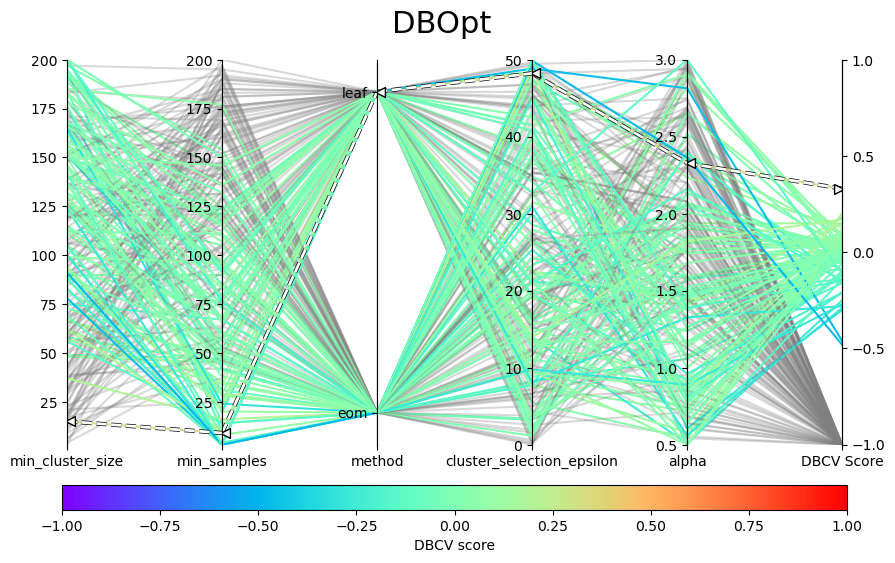

In [14]:
optimization_plot = model.plot_optimization()

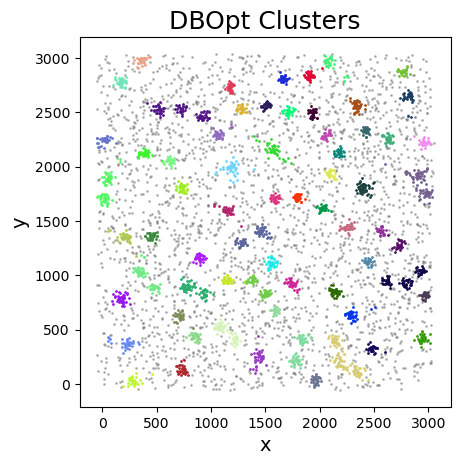

In [15]:
cluster_plot = model.plot_clusters()

# ------------------------------------------------------------------------------------------

# DBOpt with OPTICS

### DBOpt with OPTICS can currently optimize the xi and min_samples parameter.

In [4]:
model = DBOpt.DBOpt(algorithm = 'OPTICS', runs = 50, rand_n = 5, xi = [0,0.5],  min_samples = [4,200],
                    scale_params = True)

In [5]:
model.optimize_fit(X)

|   iter    |  target   | min_sa... |    xi     |
-------------------------------------------------
| 1         | -1.0      | 0.4522    | 0.6114    |
| 2         | -1.0      | 0.8579    | 0.04186   |
| 3         | -1.0      | 0.493     | 0.6654    |
| 4         | 0.09      | 0.2771    | 0.03744   |
| 5         | 0.28      | 0.08375   | 0.2264    |
| 6         | -1.0      | 0.6689    | 0.3389    |
| 7         | 0.05      | 0.2231    | 0.09172   |
| 8         | -1.0      | 0.04      | 0.8704    |
| 9         | -1.0      | 0.8474    | 0.4005    |
| 10        | -1.0      | 0.4264    | 0.1285    |
| 11        | -1.0      | 0.3249    | 0.2235    |
| 12        | -1.0      | 0.4977    | 0.6867    |
| 13        | -1.0      | 0.577     | 0.1405    |
| 14        | -1.0      | 0.8295    | 0.8309    |
| 15        | 0.02      | 0.178     | 0.227     |
| 16        | -1.0      | 0.8933    | 0.3651    |
| 17        | -1.0      | 0.7644    | 0.4221    |
| 18        | -1.0      | 0.8755    | 0.2902    |


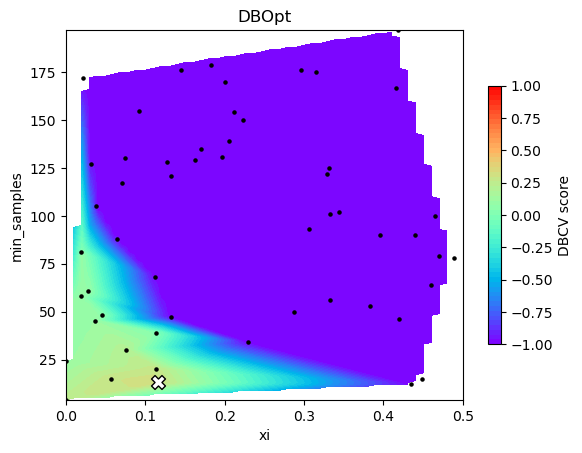

In [6]:
optimization_plot = model.plot_optimization()

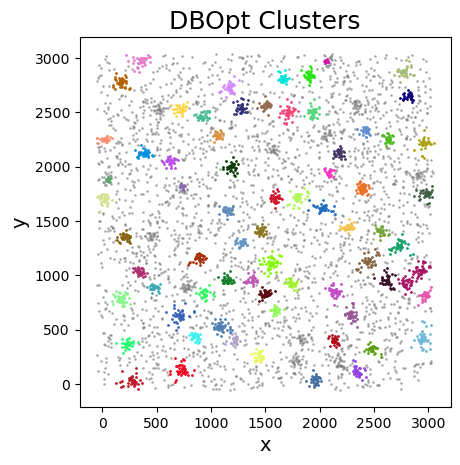

In [7]:
cluster_plot = model.plot_clusters()